# HW02
Welcome to the assignment 2 of Introduction to Data Analysis.

In this assignment, you will learn how to preprocess data using SQLite and Pandas.

Please follow the instructions below:

1. Write down your code between <br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# BEGIN_YOUR_CODE**<br>
&nbsp;&nbsp;&nbsp;&nbsp; and<br>
&nbsp;&nbsp;&nbsp;&nbsp; **\# END_YOUR_CODE**.

2. Do not use **external libraries**. (i.e., Do not use any `import` in your code) <br>
   Your code will fail to execute and get **0 score** if you use them.

3. Rename this file to **[student_id].ipynb** (e.g. 20230000.ipynb) and submit it to PLMS. <br>
   There is **30% penalty** if you do not follow the submission format.

4. Submission late is not accepted.
   You will get **No score** for late submission. 

<br>
<br>

The dataset in this assignment (cereal dataset) is cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. We sincerely thanks for making this dataset.

This dataset licensed under a Creative Commons Attribution-ShareAlike 3.0 License. License Link : https://creativecommons.org/licenses/by-sa/3.0/deed.ko

For the better understanding on the dataset, please refer to this link : https://www.kaggle.com/datasets/crawford/80-cereals

In [4]:
import sqlite3
import pandas as pd

from typing import List, Tuple

## Problem 1. SQLite and Python [10 points]

In this problem, you will learn the basic of SQlite with python.

### a. from Pandas Dataframe to SQLite Database [1 points]
Implement function `df2db` that converts pandas dataframe read from `cereal.csv` into table `cereal` and saves it in database `cereal.db`.

When you read from `cereal.csv`, you have to read only following columns : name, mfr, calories, protein, fat, carbo and sugars.

In [13]:
def df2db() -> None:
    '''
        df2db() converts pandas dataframe read from |cereal.csv| into table |cereal| and saves it in |cereal.db|.
        
        The order of columns and data in table |cereal| does not matter.
    '''
    # BEGIN_YOUR_CODE
    cereal_df = pd.read_csv('cereal.csv', sep=';', usecols=['name', 'mfr', 'calories', 'protein', 'fat', 'carbo', 'sugars'])
    conn = sqlite3.connect('cereal.db')
    cereal_df.to_sql('cereal', conn, if_exists='replace', index=False)
    conn.close()
    # END_YOUR_CODE

### b. Create Table [1 points]
Implement the function `create` that creates a table named `ceo` in database `cereal.db`. <br>
After executing the function `create`, the database `cereal.db` must contain the two tables `ceo` and `cereal`.

The contents of table `ceo` are as follow:
   | CEO      | Manufacturer | Salary | NutritionGrade |
   | :-       | :-           |  :-    | :-             |
   | John     | A            | 5000   | 80             |
   | Allen    | G            | 6000   | 70             |
   | Martin   | K            | 3500   | 55             |
   | Mary     | N            | 5500   | 60             |
   | Smith    | P            | 4500   | 40             |
   | Aliee    | Q            | 3000   | 75             |
   | Jolie    | R            | 7000   | 90             |

In [14]:
def create() -> None:
    '''
        create() connects a database named |cereal.db| and creates a table |ceo| in it.

        Columns and data types of table |ceo| are as follow:
            |CEO|             - string
            |Manufacturer|    - string
            |Salary|          - int
            |NutritionGrade|  - int
        
        The order of data insertion does not matter.
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()
    
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS ceo (
            CEO TEXT,
            Manufacturer TEXT,
            Salary INTEGER,
            NutritionGrade INTEGER
        )
    '''
    )
    
    ceo_data = [
        ('John', 'A', 5000, 80),
        ('Allen', 'G', 6000, 70),
        ('Martin', 'K', 3500, 55),
        ('Mary', 'N', 5500, 60),
        ('Smith', 'P', 4500, 40),
        ('Aliee', 'Q', 3000, 75),
        ('Jolie', 'R', 7000, 90)
    ]
    
    cursor.executemany('''
        INSERT INTO ceo (CEO, Manufacturer, Salary, NutritionGrade)
        VALUES (?,?,?,?)
    ''', ceo_data)
    
    conn.commit()
    conn.close()
    # END_YOUR_CODE

### c. Delete and Alter [1 points]
Implement function `delete` that delete the first row of the table `cereal` in database `cereal.db`. The first row is as below. \
\
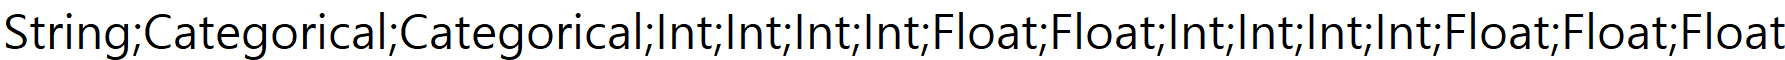

In [15]:
def delete() -> None:
    '''
        delete() deletes the second row of the table |cereal|.
        If you fail to implement this function, following problems may not be solved so implement carefully.
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()
    
    cursor.execute('''
        DELETE FROM cereal
        WHERE ROWID = (SELECT ROWID FROM cereal LIMIT 1)
    ''')

    conn.commit()
    conn.close()
    # END_YOUR_CODE

### d. Select 1 [1 points]
Implement function `select1` that fetches data where the protein is 4 or higher (>=) from table `cereal` in database `cereal.db`.

The data should be arranged in ascending order of calories.

In [21]:
def select1() -> List[Tuple[str, str, str, str, str, str, str]]:
    '''
        select1() fetches data where the protein is 4 or higher (>=) from table |cereal| in database |cereal.db| and returns them as a list of tuples.

        The tuples should be arranged in ascending order of |calories|.
        The order of tuples with the same |calories| does not matter.

        Tip : When using SQLite, there are many cases to handle text data as integer. How?

        The format of tuple should be as below:
            (str, str, str, str, str, str, str)
        which is
            (name, mfr, calories, protein, fat, carbo, sugars)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT name, mfr, calories, protein, fat, carbo, sugars
        FROM cereal
        WHERE protein >= 4
        ORDER BY CAST(calories AS INTEGER) ASC
    ''')

    result = cursor.fetchall()
    conn.close()
    return result
    # END_YOUR_CODE

[('All-Bran with Extra Fiber', 'K', '50', '4', '0', '8', '0'), ('100% Bran', 'N', '70', '4', '1', '5', '6'), ('All-Bran', 'K', '70', '4', '1', '7', '5'), ('Life', 'Q', '100', '4', '2', '12', '6'), ('Maypo', 'A', '100', '4', '1', '16', '3'), ('Quaker Oat Squares', 'Q', '100', '4', '1', '14', '6'), ('Quaker Oatmeal', 'Q', '100', '5', '2', '-1', '-1'), ('Cheerios', 'G', '110', '6', '2', '17', '1'), ('Special K', 'K', '110', '6', '0', '16', '3'), ('Muesli Raisins Dates & Almonds', 'R', '150', '4', '3', '16', '11'), ('Muesli Raisins Peaches & Pecans', 'R', '150', '4', '3', '16', '11')]


### e. Select 2 [2 points]
Implement function `select2` that fetches all data from table `cereal` in database `cereal.db` and calculates the average calories per manufacturer(mfr).

In [19]:
def select2() -> List[Tuple[str, int]]:
    '''
        select2() fetches all data from table |cereal| in database |cereal.db| and calculates the average calories per manufacturer, and returns them as a list of tuples.

        The order of tuples does not matter.

        The format of tuple should be as below:
            (str, float)
        which is
            (mfr, average of calories)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT mfr, AVG(CAST(calories AS INTEGER))
        FROM cereal
        GROUP BY mfr
    ''')

    result = cursor.fetchall()

    conn.close()
    return result
    # END_YOUR_CODE

[('A', 100.0), ('G', 111.36363636363636), ('K', 108.69565217391305), ('N', 86.66666666666667), ('P', 108.88888888888889), ('Q', 95.0), ('R', 115.0)]


### f. Join [2 points]
Implement function `join` that left-joins two tables `cereal` and `ceo` in database `cereal.db` by mfr(manufacturer).

In [20]:
def join() -> List[Tuple[str, str, str, str, str, str, str, str, str, int, int]]:
    '''
        join() left-joins two tables |cereal| and |ceo| in database |cereal.db| and returns them as a list of tuples.
        
        The order of tuples does not matter.

        The format of tuple should be as below:
            (str, str, str, str, str, str, str, str, str, int, int)
        which is
            (name, mfr, calories, protein, fat, carbo, sugars, ceo, manufacturer, salary, nutritiongrade)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT cereal.name, cereal.mfr, cereal.calories, cereal.protein, cereal.fat, cereal.carbo, cereal.sugars,
               ceo.CEO, ceo.Manufacturer, ceo.Salary, ceo.NutritionGrade
        FROM cereal
        LEFT JOIN ceo
        ON cereal.mfr = ceo.Manufacturer
    ''')

    result = cursor.fetchall()

    conn.close()

    return result
    # END_YOUR_CODE

('100% Bran', 'N', '70', '4', '1', '5', '6', 'Mary', 'N', 5500, 60)
('100% Natural Bran', 'Q', '120', '3', '5', '8', '8', 'Aliee', 'Q', 3000, 75)
('All-Bran', 'K', '70', '4', '1', '7', '5', 'Martin', 'K', 3500, 55)
('All-Bran with Extra Fiber', 'K', '50', '4', '0', '8', '0', 'Martin', 'K', 3500, 55)
('Almond Delight', 'R', '110', '2', '2', '14', '8', 'Jolie', 'R', 7000, 90)
('Apple Cinnamon Cheerios', 'G', '110', '2', '2', '10.5', '10', 'Allen', 'G', 6000, 70)
('Apple Jacks', 'K', '110', '2', '0', '11', '14', 'Martin', 'K', 3500, 55)
('Basic 4', 'G', '130', '3', '2', '18', '8', 'Allen', 'G', 6000, 70)
('Bran Chex', 'R', '90', '2', '1', '15', '6', 'Jolie', 'R', 7000, 90)
('Bran Flakes', 'P', '90', '3', '0', '13', '5', 'Smith', 'P', 4500, 40)
("Cap'n'Crunch", 'Q', '120', '1', '2', '12', '12', 'Aliee', 'Q', 3000, 75)
('Cheerios', 'G', '110', '6', '2', '17', '1', 'Allen', 'G', 6000, 70)
('Cinnamon Toast Crunch', 'G', '120', '1', '3', '13', '9', 'Allen', 'G', 6000, 70)
('Clusters', 'G', '11

### g. from SQLite Database to Pandas Dataframe [2 points]
Implement function `db2df` that converts modified table `cereal` in database `cereal.db` into pandas dataframe and saves it in `cereal_mini.csv`.

In [23]:
def db2df() -> None:
    '''
        db2df() converts table |cereal| in database |cereal.db| into pandas dataframe and saves it in |cereal_mini.csv|.

        The columns of the converted csv file should be as below:
            name,mfr,calories,protein,fat,carbo,sugars

        The order of rows does not matter.

        Let the separator as ','.
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')

    query = '''
        SELECT name, mfr, calories, protein, fat, carbo, sugars
        FROM cereal
    '''
    
    df = pd.read_sql_query(query, conn)
    df.to_csv('cereal_mini.csv', sep=',', index=False)
    conn.close()
    # END_YOUR_CODE

## Problem 2. Relational Algebra [8 points]

In this problem, you will implement the relational algebra expression by code. <br>
Connect to database `cereal.db`, execute following relational algebra expression, and return fetched data. <br>

### a. [2 points]
$\pi_{name, mfr, calories, protein, carbo}(\sigma_{carbo < 17}(cereal))$

In [34]:
def rel_alg1() -> List[Tuple[str, str, str, str, str]]:
    '''
        rel_alg1() connects to database |cereal.db|, executes given relational algebra expression, and returns fetched data as a list of tuples.
        
        The order of tuples does not matter.

        The format of tuple should be as below:
            (str, str, str, str, str)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT name, mfr, calories, protein, carbo
        FROM cereal
        WHERE CAST(carbo AS INTEGER) < 17
    ''')

    result = cursor.fetchall()
    conn.close()

    return result
    # END_YOUR_CODE

54
('100% Bran', 'N', '70', '4', '5')
('100% Natural Bran', 'Q', '120', '3', '8')
('All-Bran', 'K', '70', '4', '7')
('All-Bran with Extra Fiber', 'K', '50', '4', '8')
('Almond Delight', 'R', '110', '2', '14')
('Apple Cinnamon Cheerios', 'G', '110', '2', '10.5')
('Apple Jacks', 'K', '110', '2', '11')
('Bran Chex', 'R', '90', '2', '15')
('Bran Flakes', 'P', '90', '3', '13')
("Cap'n'Crunch", 'Q', '120', '1', '12')
('Cinnamon Toast Crunch', 'G', '120', '1', '13')
('Clusters', 'G', '110', '3', '13')
('Cocoa Puffs', 'G', '110', '1', '12')
('Corn Pops', 'K', '110', '1', '13')
('Count Chocula', 'G', '110', '1', '12')
("Cracklin' Oat Bran", 'K', '110', '3', '10')
('Crispy Wheat & Raisins', 'G', '100', '2', '11')
('Froot Loops', 'K', '110', '2', '11')
('Frosted Flakes', 'K', '110', '1', '14')
('Frosted Mini-Wheats', 'K', '100', '3', '14')
('Fruit & Fibre Dates Walnuts and Oats', 'P', '120', '3', '12')
('Fruitful Bran', 'K', '120', '3', '14')
('Fruity Pebbles', 'P', '110', '1', '13')
('Golden Cri

### b. [3 points]
$\pi_{name, mfr, calories, ceo}(\sigma_{calories-NutritionGrade>60 \: \cap \: mfr=manufacturer}(cereal \times ceo))$


In [35]:
def rel_alg2() -> List[Tuple[str, str, str, str]]:
    '''
        rel_alg2() connects to database |cereal.db|, executes given relational algebra expression, and returns fetched data as a list of tuples.
        
        The order of tuples does not matter.

        The format of tuple should be as below:
            (str, str, str, str)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT cereal.name, cereal.mfr, cereal.calories, ceo.CEO
        FROM cereal
        JOIN ceo
        ON cereal.mfr = ceo.Manufacturer
        WHERE (CAST(cereal.calories AS INTEGER) - CAST(ceo.NutritionGrade AS INTEGER)) > 60
    ''')

    result = cursor.fetchall()

    conn.close()

    return result
    # END_YOUR_CODE

13
('Fruit & Fibre Dates Walnuts and Oats', 'P', '120', 'Smith')
('Fruitful Bran', 'K', '120', 'Martin')
('Fruity Pebbles', 'P', '110', 'Smith')
('Grape-Nuts', 'P', '110', 'Smith')
('Great Grains Pecan', 'P', '120', 'Smith')
('Honey-comb', 'P', '110', 'Smith')
('Just Right Fruit & Nut', 'K', '140', 'Martin')
('Mueslix Crispy Blend', 'K', '160', 'Martin')
('Nut&Honey Crunch', 'K', '120', 'Martin')
('Nutri-Grain Almond-Raisin', 'K', '140', 'Martin')
('Post Nat. Raisin Bran', 'P', '120', 'Smith')
('Raisin Bran', 'K', '120', 'Martin')
('Total Raisin Bran', 'G', '140', 'Allen')


### c. [3 points]
$\pi_{name, protein, sugars}(\sigma_{protein < 4}(cereal)) \cup \pi_{name, protein, sugars}(\sigma_{sugars > 7}(cereal)) $

In [37]:
def rel_alg3() -> List[Tuple[str, str, str]]:
    '''
        rel_alg3() connects to database |cereal.db|, executes given relational algebra expression, and returns fetched data as a list of tuples.
        
        The order of tuples does not matter.

        The format of tuple should be as below:
            (str, str, str)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT name, protein, sugars
        FROM cereal
        WHERE CAST(protein as INTEGER) < 4
        UNION
        SELECT name, protein, sugars
        FROM cereal
        WHERE CAST(sugars as INTEGER) > 7
    ''')

    result = cursor.fetchall()

    conn.close()

    return result
    # END_YOUR_CODE

68
('100% Natural Bran', '3', '8')
('Almond Delight', '2', '8')
('Apple Cinnamon Cheerios', '2', '10')
('Apple Jacks', '2', '14')
('Basic 4', '3', '8')
('Bran Chex', '2', '6')
('Bran Flakes', '3', '5')
("Cap'n'Crunch", '1', '12')
('Cinnamon Toast Crunch', '1', '9')
('Clusters', '3', '7')
('Cocoa Puffs', '1', '13')
('Corn Chex', '2', '3')
('Corn Flakes', '2', '2')
('Corn Pops', '1', '12')
('Count Chocula', '1', '13')
("Cracklin' Oat Bran", '3', '7')
('Cream of Wheat (Quick)', '3', '0')
('Crispix', '2', '3')
('Crispy Wheat & Raisins', '2', '10')
('Double Chex', '2', '5')
('Froot Loops', '2', '13')
('Frosted Flakes', '1', '11')
('Frosted Mini-Wheats', '3', '7')
('Fruit & Fibre Dates Walnuts and Oats', '3', '10')
('Fruitful Bran', '3', '12')
('Fruity Pebbles', '1', '12')
('Golden Crisp', '2', '15')
('Golden Grahams', '1', '9')
('Grape Nuts Flakes', '3', '5')
('Grape-Nuts', '3', '3')
('Great Grains Pecan', '3', '4')
('Honey Graham Ohs', '1', '11')
('Honey Nut Cheerios', '3', '10')
('Honey-c

## Problem 3. SQL Query Exercise [10 points]
In this problem, do not just fetch all data from table and use basic python operations to solve the problem. <br>
Only SQL query is allowed.

### a. Complicated Select 1 [4 ponts]

Implement `comp_select1` that calculates the average fat of cereals for each manufacturer except for the cereal where the calories is under 90(< 90)  using table `cereal` in database `cereal.db`.


In [42]:
def comp_select1() -> List[Tuple[str, float, str]]:
    '''
        comp_select1() calculates the average fat of cereals for each manufacturer except for the cereal where the calories is 90 or above (>= 90), 
        and returns them as a list of tuples. 

        The tuples should be arranged in ascending order of average fat.

        The format of tuple should be as below:
            (str, float, str)
        which is
            (mfr, average of fat, calories)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT mfr, 
        AVG(CAST(fat AS FLOAT)) AS avg_fat, 
        CAST(AVG(CAST(calories AS FLOAT)) AS TEXT) AS avg_calories
        FROM cereal
        WHERE CAST(calories AS FLOAT) >= 90
        GROUP BY mfr
        ORDER BY avg_fat ASC;
    ''')

    result = cursor.fetchall()

    conn.close()
    return result
    # END_YOUR_CODE

[('N', 0.0, '92.5'), ('K', 0.6190476190476191, '113.333333333333'), ('P', 0.8888888888888888, '108.888888888889'), ('A', 1.0, '100.0'), ('R', 1.25, '115.0'), ('G', 1.3636363636363635, '111.363636363636'), ('Q', 2.3333333333333335, '110.0')]


### b. Complicated Select 2 [6 ponts]

Implement `comp_select2` that finds every pair of cereals, where the sum of protein is 10 or above and the sum of carbo is 24 or below, except for the case if the sum of fat is 10 or above. using table `cereal` in database `cereal.db`.


In [45]:
def comp_select2() -> List[Tuple[str, str]]:
    '''
        comp_select2() finds every pair of distinct cereals where the sum of protein is 10 or above and the sum of carbo is 24 or below
        using table |cereal| in database |cereal.db|, and returns them as a list of tuples.

        The order of tuples does not matter.
        There should be no tuple where the content is same but the order inside the tuple is different.
        For example, if you have ('a', 'b') and ('b', 'a') in your results, you have to only keep ('a', 'b'), which follows lexicographic order.

        The format of tuple should be as below:
            (str, str)
        which is
            (name1, name2)
    '''
    # BEGIN_YOUR_CODE
    conn = sqlite3.connect('cereal.db')
    cursor = conn.cursor()

    cursor.execute('''
        SELECT c1.name, c2.name
        FROM cereal c1, cereal c2
        WHERE c1.name < c2.name  
        AND (c1.protein + c2.protein) >= 10
        AND (c1.carbo + c2.carbo) <= 24
        AND (c1.fat + c2.fat) < 10
    ''')

    result = cursor.fetchall()

    conn.close()
    return result
    # END_YOUR_CODE

('100% Bran', 'Cheerios')
('100% Bran', 'Special K')
('All-Bran', 'Cheerios')
('All-Bran', 'Special K')
('All-Bran with Extra Fiber', 'Special K')
('Cheerios', 'Quaker Oatmeal')
('Quaker Oatmeal', 'Special K')
7
